> # $\textbf{Strides number function of CPU Time, Bandwidth}$
$\textbf{60,000,000 samples running on }$
$\textbf{Intel® Celeron(R) CPU N3060 @ 1.60GHz × 2 ( 2 cores, 2 Threads) on }$
$\textbf{8 GB of RAM and SSD SATA III}$


> $\textbf{Exercise 1 day01}$

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

> ## $\textbf{ O0 & O2 Compilation optimizer}$ 

In [2]:
O0 = [
1 , 429.950000, 196.815491 ,
2 , 447.331000, 204.771881 ,
3 , 466.855000, 213.709259 ,
4 , 475.632000, 217.727051 ,
5 , 530.351000, 242.775421 ,
6 , 545.772000, 249.834595 ,
7 , 576.940000, 264.102173 ,
8 , 598.728000, 274.075928 ,
9 , 637.241000, 291.705780 ,
10 , 671.769000, 307.511444 ,
11 , 705.860000, 323.117065 ,
12 , 735.802000, 336.823425 ,
13 , 782.137000, 358.033905 ,
14 , 837.563000, 383.405914 ,
15 , 906.058000, 414.760437 ,
16 , 954.936000, 437.135010 ,
17 , 1011.324000, 462.947388 ,
18 , 1096.924000, 502.131958 ,
19 , 1137.612000, 520.757446 ,
20 , 1192.477000, 545.872650]

In [3]:
O2 = [
1 , 45.921000, 21.020966, 
2 , 46.039000, 21.074982 ,
3 , 46.074000, 21.091003 ,
4 , 45.918000, 21.019592 ,
5 , 45.875000, 20.999908 ,
6 , 46.037000, 21.074066 ,
7 , 45.911000, 21.016388 ,
8 , 45.964000, 21.040649 ,
9 , 45.907000, 21.014557 ,
10 , 45.936000, 21.027832 ,
11 , 45.897000, 21.009979 ,
12 , 45.896000, 21.009521 ,
13 , 45.980000, 21.047974 ,
14 , 45.853000, 20.989838 ,
15 , 45.913000, 21.017303 ,
16 , 45.865000, 20.995331 ,
17 , 45.934000, 21.026917 ,
18 , 45.897000, 21.009979 ,
19 , 45.842000, 20.984802 ,
20 , 46.413000, 21.246185 ]

> ## $\textbf{Stride function of CPU Time}$

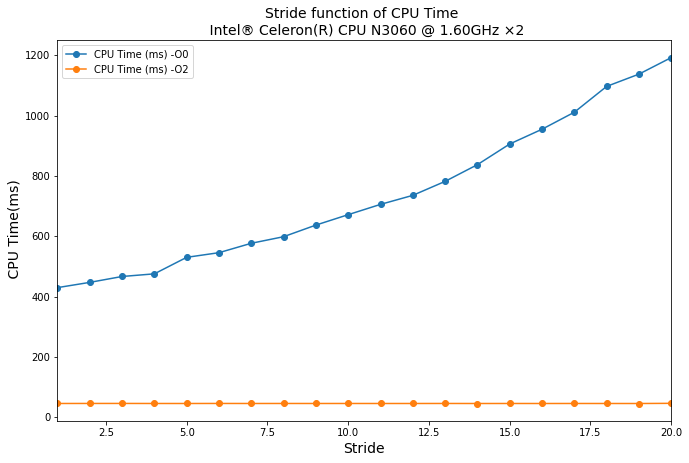

In [4]:
plt.figure(figsize=(11, 7))
plt.plot([i for i in range(1, 21)], O0[1:len(O0):3], '-o', label='CPU Time (ms) -O0')
plt.plot([i for i in range(1, 21)], O2[1:len(O2):3], '-o', label='CPU Time (ms) -O2')
plt.xlabel("Stride", fontsize=14)
plt.ylabel(" CPU Time(ms)", fontsize=14)
plt.title("Stride function of CPU Time \n Intel® Celeron(R) CPU N3060 @ 1.60GHz ×2", fontsize=14)
plt.legend()
plt.xlim(1, 20)

plt.show()

> $\textbf{Le nombre de stride optimaux est 2 }$

> ## $\textbf{Stride function of Bandwidth}$

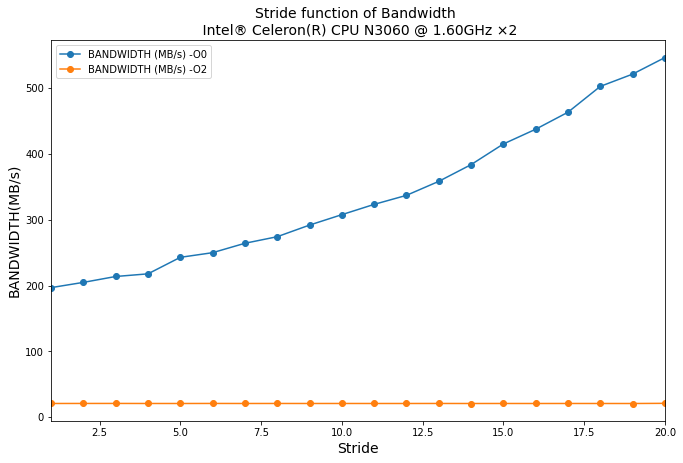

In [5]:
plt.figure(figsize=(11, 7))
plt.plot([i for i in range(1, 21)], O0[2:len(O0):3], '-o', label='BANDWIDTH (MB/s) -O0')
plt.plot([i for i in range(1, 21)], O2[2:len(O2):3], '-o', label='BANDWIDTH (MB/s) -O2')
plt.xlabel("Stride", fontsize=14)
plt.ylabel("BANDWIDTH(MB/s)", fontsize=14)
plt.title("Stride function of Bandwidth \n Intel® Celeron(R) CPU N3060 @ 1.60GHz ×2", fontsize=14)
plt.xlim(1, 20)
plt.legend()
plt.show()

> $\textbf{Le nombre de stride optimaux est 2 en tenant compte du temps CPU et de la bande passante comme les graphiques ci-dessus. }$
> $\textbf{Exercise 2 day01}$
Implementation of  the $MxM$ multiplication using the block version.

In [41]:
import numpy as np
import time

In [55]:
def multiply_matrix(length, stride):
  """
  Implementation of  the MxM multiplication using the block version.

  Arg(s):
    length(int): rows and columns of the matrix X_MAT, Y_MAT and Z_MAT
    stride(int): the block size
  Return(s):
    cpu_time_list(list): computed cpu time in millisecond
    bandwidth_list(list): bandwidth in MB/s
  """
  X_MAT = np.ones((length, length))
  Y_MAT = np.ones((length, length))
  Z_MAT = np.zeros((length, length))

  R_T = np.zeros((stride, stride))
  U_T = np.zeros((stride, stride))
  V_T = np.zeros((stride, stride))
  cpu_time_list = []
  bandwidth_list = []

  for istride in range(1, stride+1):
    start = time.time()

    for i in range(0, length-stride, stride):
      for j in range(0, length-stride, stride):
        for k1 in range(0, stride):
          for k2 in range(0, stride):
            R_T[k1, k1] = Z_MAT[i+k1, j+k2]

        for k in range(0, length-stride, stride):

          for k1 in range(0, stride):
            for k2 in range(0, stride):
              U_T[k1, k2] = X_MAT[i+k1, k+k2]
              V_T[k1, k2] = Y_MAT[k+k1, j+k2]

          for ii in range(0, stride):
            for jj in range(0, stride):
              for kk in range(0, stride):
                R_T[ii, jj] = R_T[ii, jj] + U_T[ii, kk]*V_T[kk, jj]

        for k1 in range(0, stride):
          for k2 in range(0, stride):
            Z_MAT[i+k1, j+k2] = R_T[k1, k2]
    
    end = time.time()
    cpu_time = 1000.0*(end-start)   # in millisecond
    cpu_time_list.append(cpu_time)

    bandwidth = 8 * length * (1000.0 / cpu_time) / (1024*1024)    #bandwidth in MB/s
    bandwidth_list.append(bandwidth)

  return cpu_time_list, bandwidth_list

In [70]:
length, stride = 300, 20
output  = multiply_matrix(length=length, stride=stride)

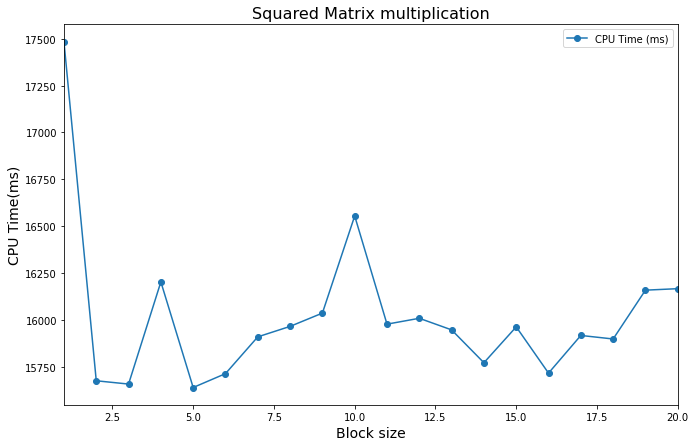

In [73]:
plt.figure(figsize=(11, 7))
plt.plot([i for i in range(1, 21)], output[0], '-o', label='CPU Time (ms)')
plt.xlabel("Block size", fontsize=14)
plt.ylabel("CPU Time(ms)", fontsize=14)
plt.title("Squared Matrix multiplication", fontsize=16)
plt.xlim(1, 20)
plt.legend()
plt.show()

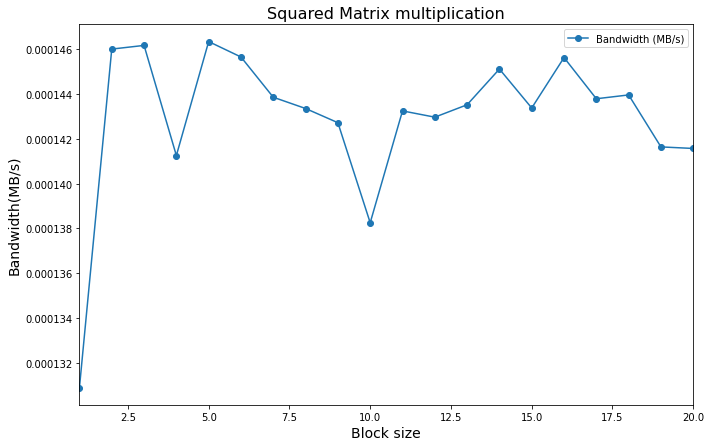

In [74]:
plt.figure(figsize=(11, 7))
plt.plot([i for i in range(1, 21)], output[1], '-o', label='Bandwidth (MB/s)')
plt.xlabel("Block size", fontsize=14)
plt.ylabel("Bandwidth(MB/s)", fontsize=14)
plt.title("Squared Matrix multiplication", fontsize=16)
plt.xlim(1, 20)
plt.legend()
plt.show()

> *The optimal block size is $3$.  It possesses the lowest ( ms ) computing CPU time and in average, it has a maximum bandwidth ( MB/s ), as shown by the two plots above*